In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from matplotlib import cm

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

model = sm.ols(formula='sales ~ TV + radio', data=df)
fit = model.fit()

x_surf = np.arange(0, 350, 20)
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                np.array(out).reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(df['TV'], df['radio'], df['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

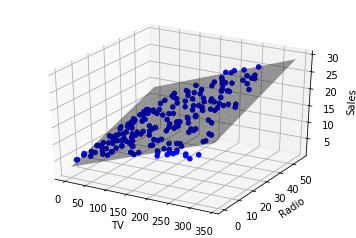